## Assignment 1- TMDB Box Office Prediction

In [271]:
# Data files available in tmdb-box-office-prediction.

import os
print(os.listdir("../tmdb-box-office-prediction"))


['.ipynb_checkpoints', 'Assignment -1TMDB Box Office Prediction.ipynb', 'Assignment 3.ipynb', 'catboost_info', 'practice.ipynb', 'prctice 2.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


### Importing libraries/ loading

In [273]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import OrderedDict
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Loading Data set

In [274]:
train = pd.read_csv("../tmdb-box-office-prediction/train.csv") #train data set
test = pd.read_csv("../tmdb-box-office-prediction/test.csv") #test data set

### pre-processing

In [275]:
train.shape, test.shape #rows and columns of test and train data set

((3000, 23), (4398, 22))

In [276]:
train.info() #info for train data set -elements/types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [277]:
test.info() #info for test data set -elements/types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [278]:
train.head() #top 5 rows of train data set

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [279]:
test.head() #top 5 rows of test data set

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [280]:
test.isna().sum() #null values in the columns 

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [281]:
train.isna().sum() #null values in the columns

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## EDA- Exploratory Data Analysis

In [282]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [283]:
train['budget'].describe() #descibing budget in train data set

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

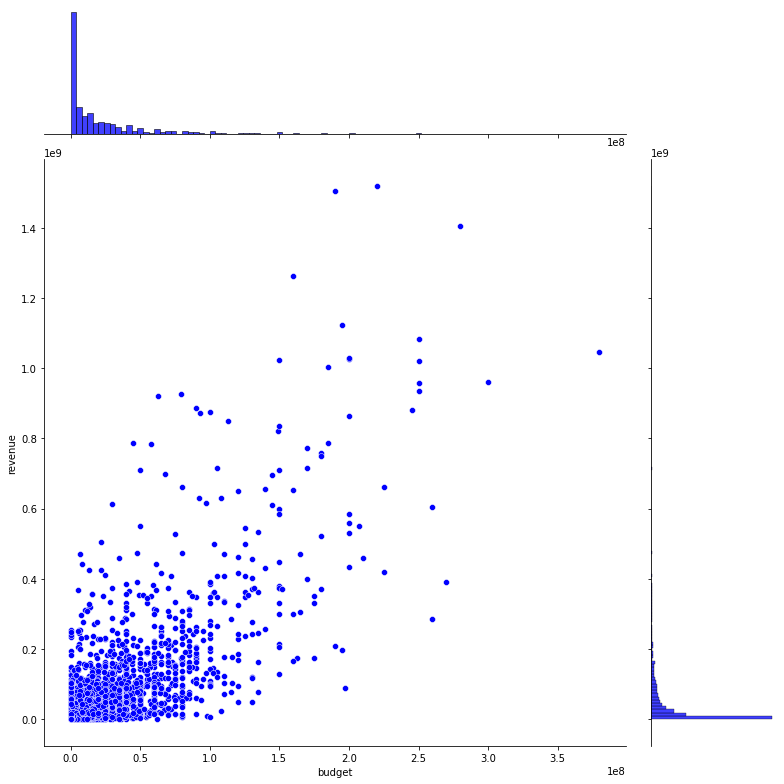

In [284]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="blue")
plt.show() # jointplot for budget and revenue combined

### removing features which are not relevant for our prediction learning

In [285]:
test.drop(['imdb_id'], axis=1, inplace = True)

In [286]:
test.drop(['poster_path'], axis=1, inplace = True)

In [287]:
train.drop(['imdb_id'], axis=1, inplace = True)

In [288]:
train.drop(['poster_path'], axis=1, inplace = True)

In [289]:
#shortlisitng movies with highest revenues accoding to they id
revenue = train.sort_values(by='revenue', ascending = False)
print("10 Movies with highest revenue and their id\n")
print((revenue.loc[:,"revenue"]).head(10))

10 Movies with highest revenue and their id

1126    1519557910
1761    1506249360
2770    1405403694
684     1262886337
2322    1123746996
906     1084939099
2135    1045713802
2562    1028570889
881     1025491110
734     1023784195
Name: revenue, dtype: int64


In [290]:
#shortlisitng movies with highest revenues accoding to they id
Budget = train.sort_values(by='budget', ascending = False)
print("10 Movies with highest budget and their id\n")
print((Budget.loc[:,"budget"]).head(10))

10 Movies with highest budget and their id

2135    380000000
2209    300000000
2770    280000000
1425    270000000
1270    260000000
1630    260000000
2532    250000000
961     250000000
906     250000000
666     250000000
Name: budget, dtype: int64


In [291]:
#fixing belong to collection null values and converting them 
#to 0 and 1 so that easy to use later on.
test['Collection'] =0
test.loc[test['belongs_to_collection'].isnull() == False, 'Collection'] = 1
train ['Collection'] =0
train.loc[train['belongs_to_collection'].isnull() == False, 'Collection'] = 1

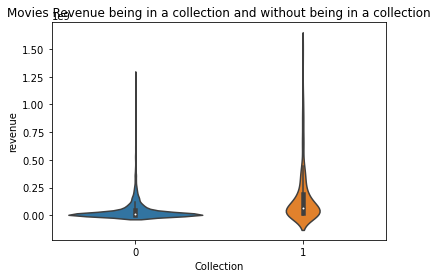

In [292]:
#graph collection against revenue
#collections v/s Revenue
sns.violinplot(x='Collection', y='revenue', data=train);
plt.title('Movies Revenue being in a collection and without being in a collection');

In [293]:
#dropping because new column with 01 has been added
train=train.drop(['belongs_to_collection'],axis =1)
test=test.drop(['belongs_to_collection'],axis =1)

In [294]:
#fixing homepage null values and converting them 
#to 0 and 1 so that easy to use later on.
train['new_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'new_homepage'] = 1
test['new_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'new_homepage'] = 1


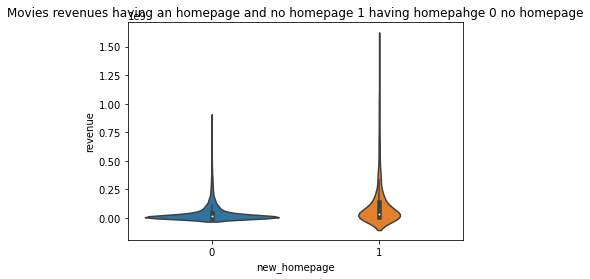

In [295]:
#graph homepage against revenue
#homepage v/s Revenue
sns.violinplot(x='new_homepage', y='revenue', data=train);
plt.title('Movies revenues having an homepage and no homepage 1 having homepahge 0 no homepage');

In [296]:
#dropping homepage as new column for values with 01 has been added
train = train.drop(['homepage'],axis =1)
test = test.drop(['homepage'],axis =1)

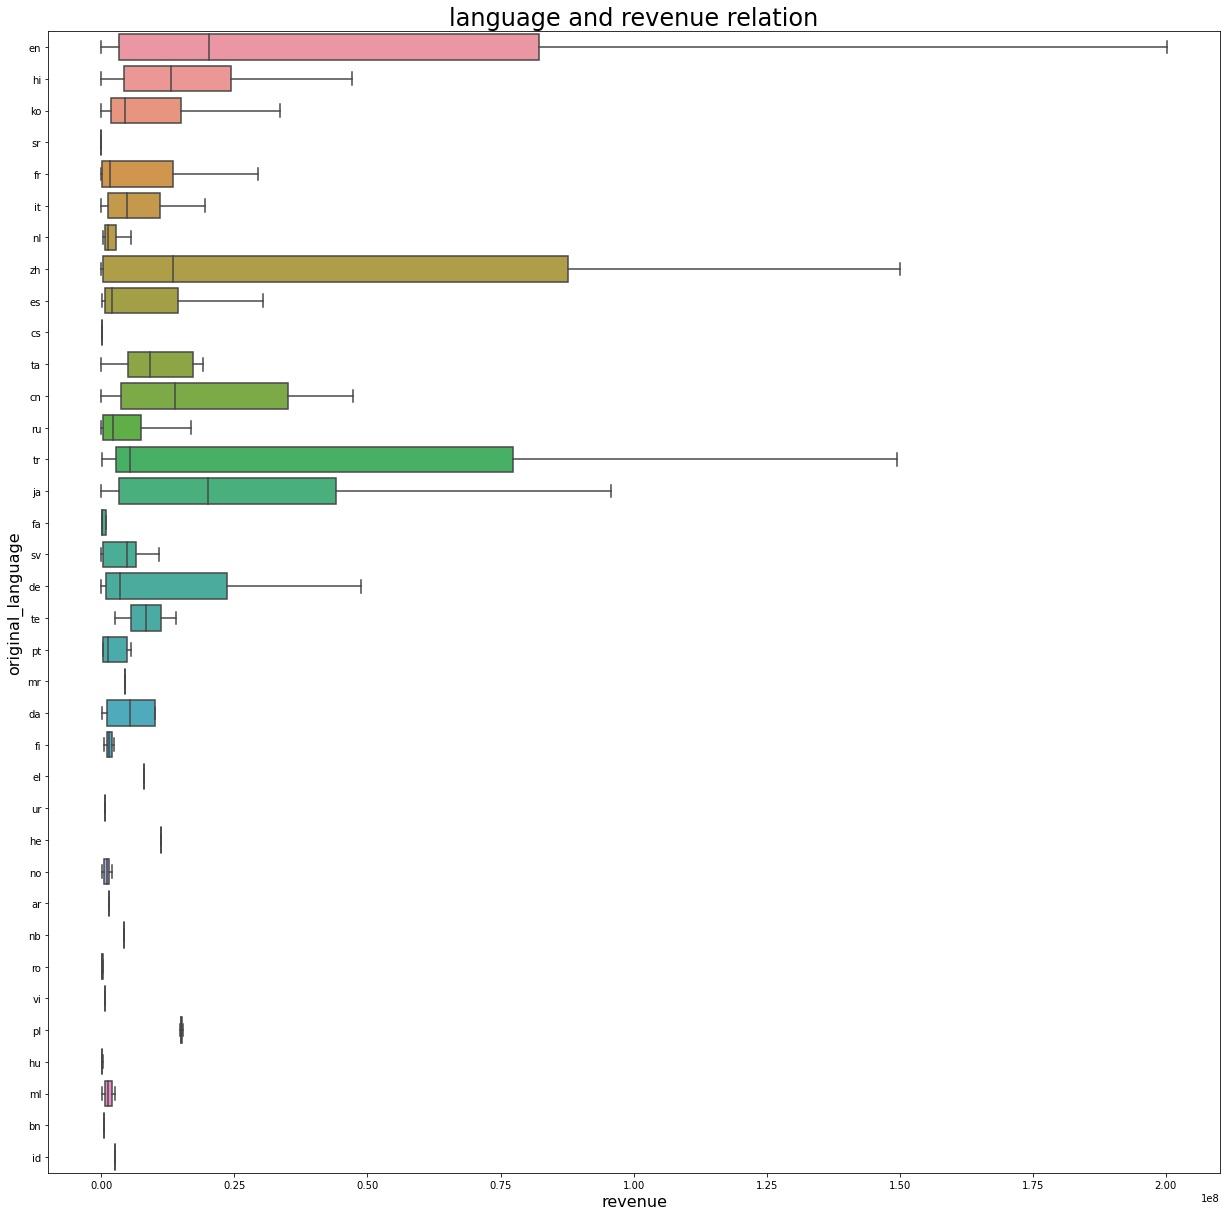

In [297]:
#language wise revenue impact

fig, ax = plt.subplots(figsize=(21, 21))
plt.title('language and revenue relation', fontsize=24)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('Language', fontsize=16)
sns.boxplot(ax=ax, x='revenue', y='original_language', data=train, orient='h', showfliers=False)
plt.show()

#### some languages have more revenue than the other possibly because of factors of high ticket prices in those speaking regions which directly impact revenue

Text(0, 0.5, 'revenue')

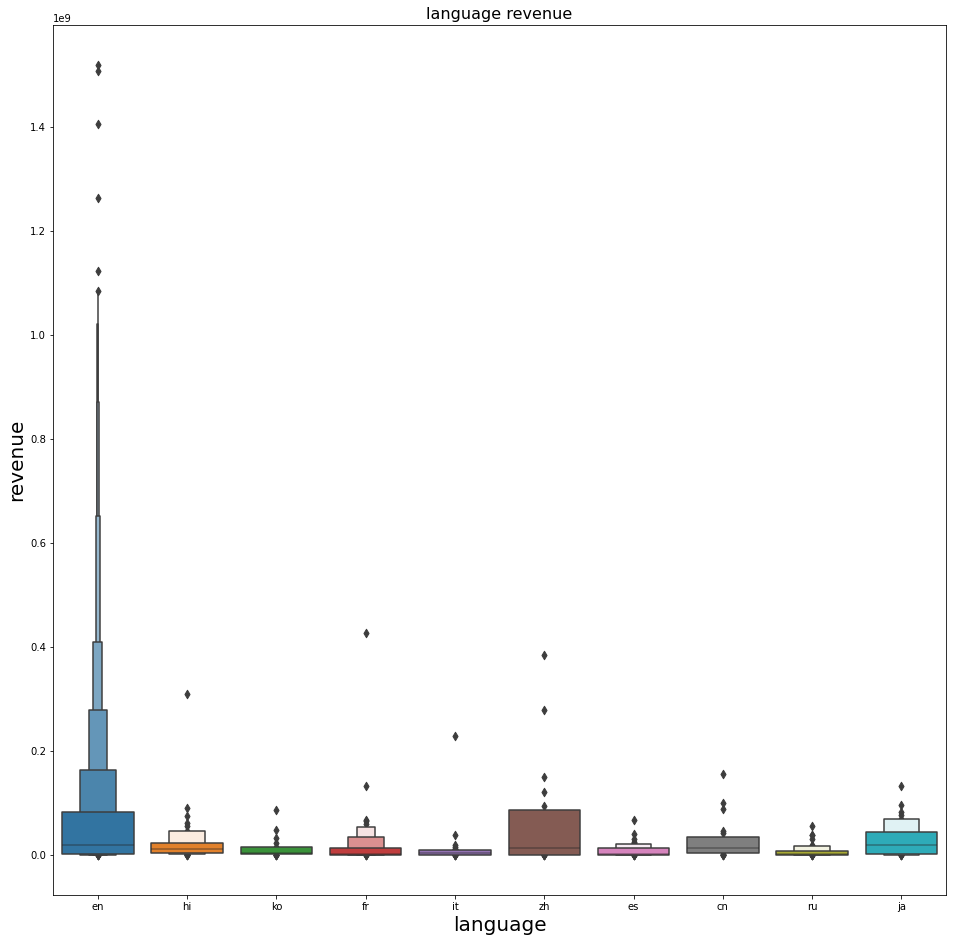

In [298]:
#language contribution on revenue on top 10 languages
plt.figure(figsize=(16,16))

a = sns.boxenplot(x='original_language', y='revenue', data=train[(train['original_language'].isin((train['original_language'].sort_values().value_counts()[:10].index.values)))])
a.set_xticklabels(a.get_xticklabels())
a.set_title("language revenue", fontsize=16)
a.set_xlabel('language', fontsize=20)
a.set_ylabel('revenue', fontsize=20)

#### most common languages using wordcloud

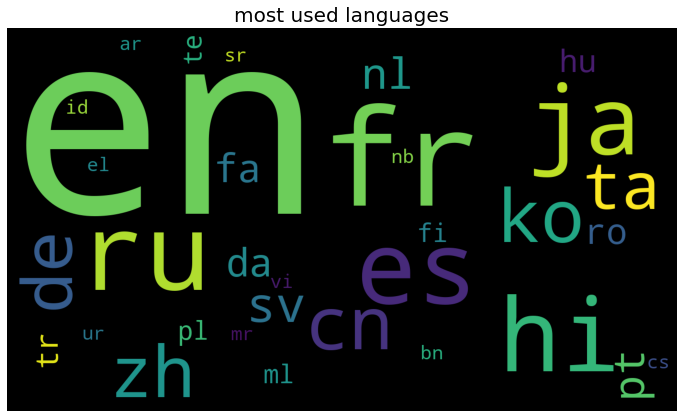

In [299]:
plt.figure(figsize = (12, 8))
text = ' '.join(train['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False, width=1400, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('most used languages', fontsize=20)
plt.axis("off")
plt.show()

In [300]:
#taking most frequent languages in account and putting the values to 0-1

train['original_language'] = train['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' 
                                                                                          else 3 if x=='hi'
                                                                                          else 0))

In [301]:
test['original_language'] = test['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' 
                                                                                          else 3 if x=='hi'
                                                                                          else 0))

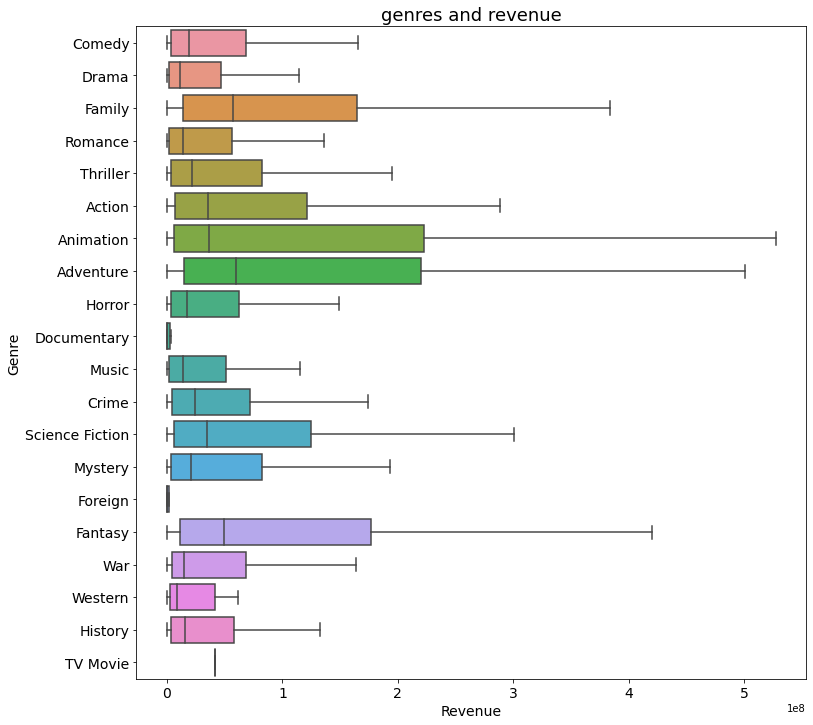

In [302]:
#genres creating a new array for repeated evenue and storing 
#graph/boxplot for relation for genre and revenue
genres = []
Repeated_Revenue = []
for i in range(len(train)):
  if train['genres'][i] == train['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(train['genres'][i])]
      genres.extend(movie_genre)
      Repeated_Revenue.extend([train['revenue'][i]]*len(movie_genre))
  
genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = Repeated_Revenue

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='both', labelsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('genres and revenue', fontsize=18)
plt.xlabel('Revenue', fontsize=14)

sns.boxplot(ax=ax, x=Repeated_Revenue, y=genres, showfliers=False, orient='h')
plt.show()


##### finding genre in each movie

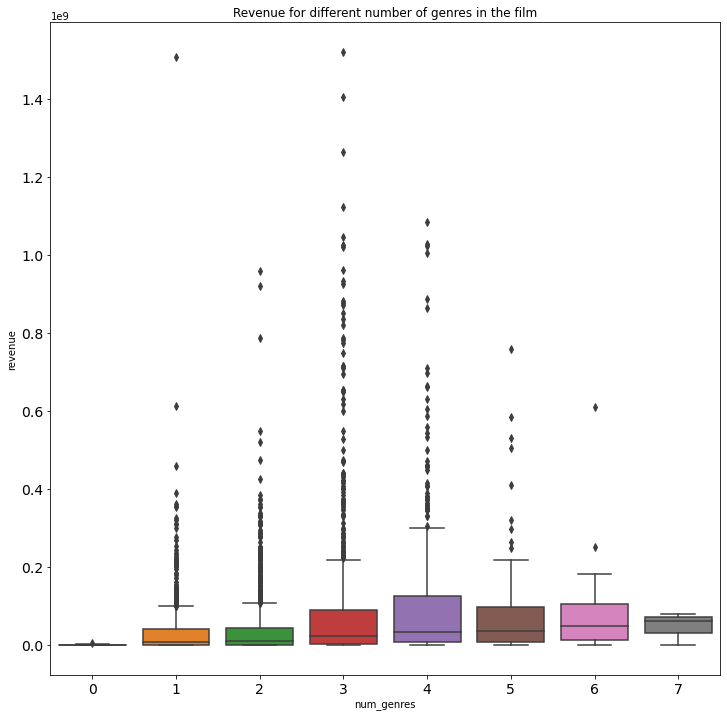

In [303]:


Genre_Count=[]
for i in train['genres']:
    if(not(pd.isnull(i))):
        
        Genre_Count.append(len(eval(i)))
        
    else:
        Genre_Count.append(0)
train['num_genres'] = Genre_Count

fig, ax = plt.subplots(figsize=(12, 12))
ax.tick_params(axis='both', labelsize=14)
sns.boxplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');
plt.show()

In [304]:
#genre count for test data not presenting graphically as train data is presentted
genre_count=[]
for i in test['genres']:
    if(not(pd.isnull(i))):
        
        genre_count.append(len(eval(i)))
        
    else:
        genre_count.append(0)
test['num_genres'] = genre_count

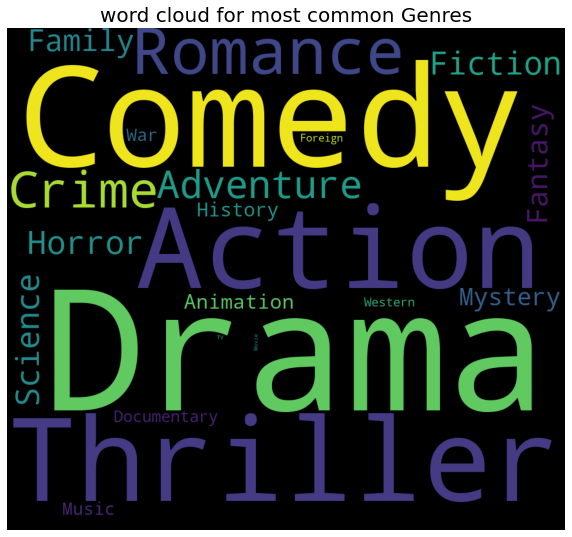

In [305]:
plt.figure(figsize = (10, 10))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1000, height=900).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('word cloud for most common Genres', fontsize=20)

plt.show()

In [306]:
#dropping
train.drop(['genres'],axis=1, inplace = True)
test.drop(['genres'],axis=1, inplace = True)

#### production company

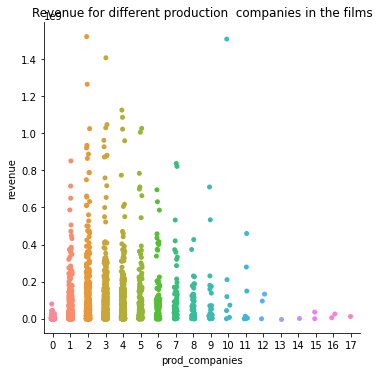

In [307]:
# production company count and graphical discription between revenue and profuction company
prodcomp_count=[]
for i in train['production_companies']:
    if(not(pd.isnull(i))):
        
        prodcomp_count.append(len(eval(i)))
        
    else:
        prodcomp_count.append(0)
train['prod_companies'] = prodcomp_count

sns.catplot(x='prod_companies', y='revenue', data=train)
plt.title('Revenue for different production  companies in the films')
plt.show()

In [308]:
# production company count and graphical discription production company
#test data
prod_compcount_test=[]
for i in test['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_compcount_test.append(len(eval(i)))
    
    else:
        prod_compcount_test.append(0)
test['num_prod_companies'] = prod_compcount_test

In [309]:
#Dropping production_companies
train.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

#### production countries

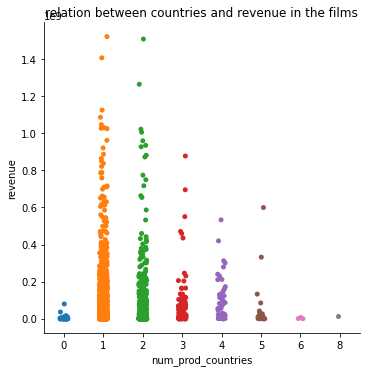

In [310]:
#production countries count and graphial discription between revenue and production countries
# train data

prodcoun_count=[]
for i in train['production_countries']:
    if(not(pd.isnull(i))):
        
        prodcoun_count.append(len(eval(i)))
        
    else:
        prodcoun_count.append(0)
train['num_prod_countries'] = prodcoun_count

sns.catplot(x='num_prod_countries', y='revenue', data=train);
plt.title('relation between countries and revenue in the films');


In [311]:
#production countries count and adding the values to test data
prodcoun_count_test=[]
for i in test['production_countries']:
    if(not(pd.isnull(i))):
        
        prodcoun_count_test.append(len(eval(i)))
        
    else:
        prodcoun_count_test.append(0)
test['num_prod_countries'] = prodcoun_count_test


In [312]:
#Dropping production_countries
train.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

#### Cast 

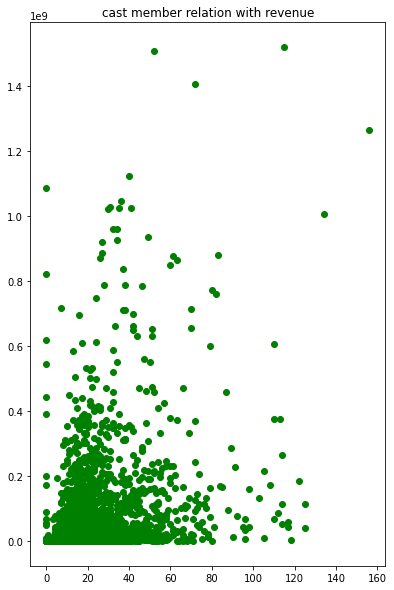

In [313]:
# making total cast column and adding total cast count

Total_Cast=[]
for i in train['cast']:
    if(not(pd.isnull(i))):
        
        Total_Cast.append(len(eval(i)))
        
    else:
        Total_Cast.append(0)
train['cast_count'] = Total_Cast




plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
plt.scatter(train['cast_count'], train['revenue'], color= 'g')
plt.title('cast member relation with revenue');

In [314]:
# test data 
Total_Cast=[]
for i in test['cast']:
    if(not(pd.isnull(i))):
        
        Total_Cast.append(len(eval(i)))
        
    else:
        Total_Cast.append(0)
test['cast_count'] = Total_Cast

In [315]:
#Dropping cast
train = train.drop(['cast'],axis=1)
test = test.drop(['cast'],axis=1)

#### overview

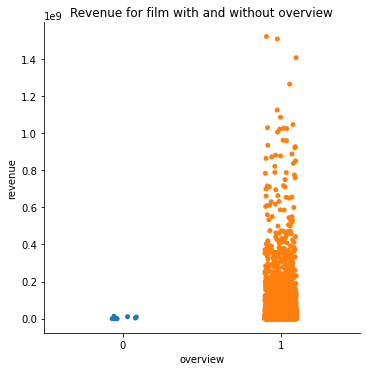

In [316]:
#overview setting the value to 0 or 1
train['overview']=train['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview']=test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
sns.catplot(x='overview', y='revenue', data=train);
plt.title('Revenue for film with and without overview');


In [317]:
train['revenue'].head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

In [318]:
#dropping revenue 
train = train.drop(['overview'],axis=1)
test = test.drop(['overview'],axis=1)

#### crew

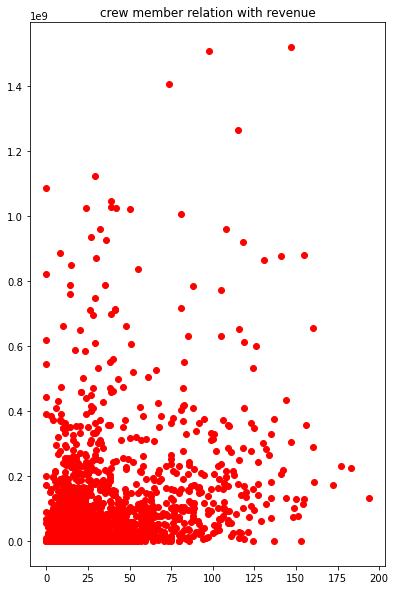

In [319]:
#crew
# making total crew column and adding total crew count
Total_Crew=[]
for i in train['crew']:
    if(not(pd.isnull(i))):
        
        Total_Crew.append(len(eval(i)))
        
    else:
        Total_Crew.append(0)
train['crew_count'] = Total_Crew

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.scatter(train['crew_count'], train['revenue'], color = 'r')
plt.title('crew member relation with revenue');

In [320]:
# making total crew column and adding total crew count
#test data 
Total_Crew=[]
for i in test['crew']:
    if(not(pd.isnull(i))):
        
        Total_Crew.append(len(eval(i)))
        
    else:
        Total_Crew.append(0)
test['crew_count'] = Total_Crew

In [321]:
#Dropping crew
train = train.drop(['crew'],axis=1)
test = test.drop(['crew'],axis=1)

In [322]:
# dropping more not required columns
#Dropping original_title
train = train.drop(['original_title'],axis=1)
test = test.drop(['original_title'],axis=1)

In [323]:
#Feature not required 
train.drop(['status'],axis=1,inplace =True)
test.drop(['status'],axis=1,inplace =True)

### finding coorelation between revenue, popularity, runtime, budget

<AxesSubplot:>

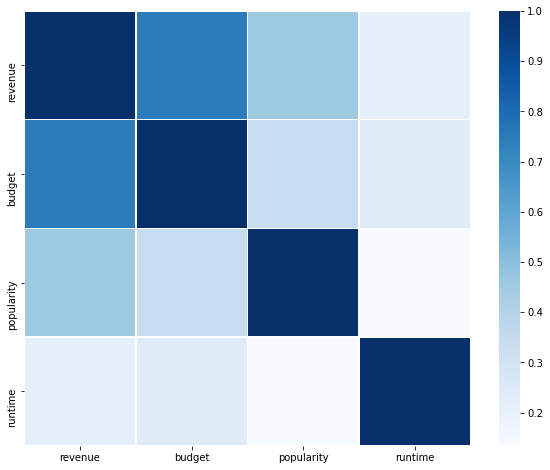

In [324]:
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Blues")

#### graphical depection of highly coorelated budget and revenue

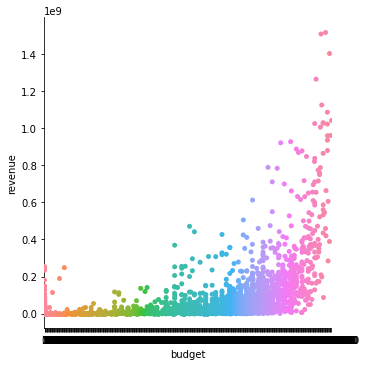

In [325]:
#budget and revenue are highly correlated
sns.catplot(x="budget", y="revenue", data = train)

## Revenue relation with date and day

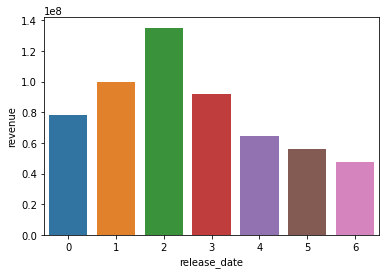

In [326]:
# checking revenue dependency on day
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

Release_Day = train['release_date'].value_counts().sort_index()
# release_date here refers to day of week.
Release_Day_Revenue = train.groupby(['release_date'])['revenue'].sum()
Release_Day_Revenue.index = Release_Day_Revenue.index.dayofweek
sns.barplot(Release_Day_Revenue.index,Release_Day_Revenue, data = train,ci=None)
plt.show()

In [327]:
#adding day to the data 

train['release_day'] = train['release_date'].dt.dayofweek 
test['release_day'] = test['release_date'].dt.dayofweek 

In [328]:
#filling nulls in test
test['release_day'] = test['release_day'].fillna(0)
#filling nulls in test
train['release_day'] = train['release_day'].fillna(0)

In [329]:
#dropping release_date column and addding different columns in place

train.drop(['release_date'],axis=1,inplace=True)
test.drop(['release_date'],axis=1,inplace=True)

#### Keywords

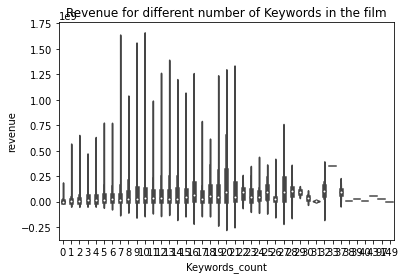

In [333]:
#keywords count column added with 01 values

Keywords_Count=[]
for i in train['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_Count.append(len(eval(i)))
        
    else:
        Keywords_Count.append(0)
train['Keywords_count'] = Keywords_Count

sns.violinplot(x='Keywords_count', y='revenue', data=train, alpha=.9, height=6);
plt.title('Revenue for different number of Keywords in the film');

In [334]:
# test data keywords

Keywords_Count=[]
for i in test['Keywords']:
    if(not(pd.isnull(i))):
        
        Keywords_Count.append(len(eval(i)))
        
    else:
        Keywords_Count.append(0)
test['Keywords_count'] = Keywords_Count


In [335]:
#Test data drop
test = test.drop(['Keywords'],axis=1)
test = test.drop(['title'],axis=1)

In [336]:
#Train set drop
train = train.drop(['Keywords'],axis=1)
train = train.drop(['title'],axis=1)


Text(0.5, 1.0, 'revenue coorelation with tagline and without')

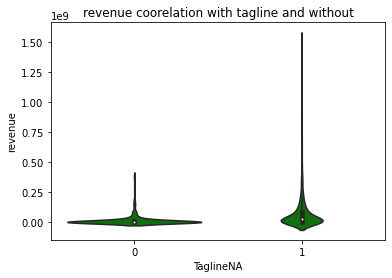

In [337]:
train['TaglineNA'] = 0
train.loc[train['tagline'].isnull() == False, 'TaglineNA'] = 1
test['TaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'TaglineNA'] = 1

#Homepage v/s Revenue
sns.violinplot(x='TaglineNA', y='revenue', data = train, color = 'g');
plt.title('revenue coorelation with tagline and without')

In [338]:
#dropping tagline
train.drop(['tagline'],axis=1,inplace =True)
test.drop(['tagline'],axis=1,inplace =True)

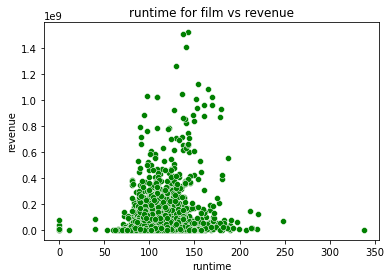

In [339]:
# runtime has null so making the runtime to mean
#graph 

train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(test['runtime'].mean())

sns.scatterplot(x='runtime', y='revenue', data = train, color = 'g');
plt.title('runtime for film vs revenue')
plt.show()

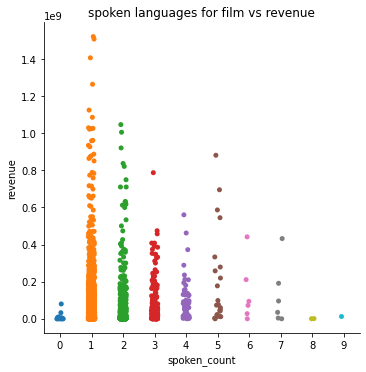

In [340]:
#adding number of spoken languages for each movie
Spoken_Count=[]
for i in train['spoken_languages']:
    if(not(pd.isnull(i))):
        
        Spoken_Count.append(len(eval(i)))
        
    else:
        Spoken_Count.append(0)
train['spoken_count'] = Spoken_Count


sns.catplot(x='spoken_count', y='revenue', data = train);
plt.title('spoken languages for film vs revenue')
plt.show()

In [341]:
Spoken_Count=[]
for i in test['spoken_languages']:
    if(not(pd.isnull(i))):
        
        Spoken_Count.append(len(eval(i)))
        
    else:
        Spoken_Count.append(0)
test['spoken_count'] = Spoken_Count

In [342]:
#dropping spoken_languages
train.drop(['spoken_languages'],axis=1,inplace=True)
test.drop(['spoken_languages'],axis=1,inplace=True)

In [343]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   budget              3000 non-null   int64  
 2   original_language   3000 non-null   int64  
 3   popularity          3000 non-null   float64
 4   runtime             3000 non-null   float64
 5   revenue             3000 non-null   int64  
 6   Collection          3000 non-null   int64  
 7   new_homepage        3000 non-null   int64  
 8   num_genres          3000 non-null   int64  
 9   prod_companies      3000 non-null   int64  
 10  num_prod_countries  3000 non-null   int64  
 11  cast_count          3000 non-null   int64  
 12  crew_count          3000 non-null   int64  
 13  release_day         3000 non-null   int64  
 14  Keywords_count      3000 non-null   int64  
 15  TaglineNA           3000 non-null   int64  
 16  spoken

In [344]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4398 non-null   int64  
 1   budget              4398 non-null   int64  
 2   original_language   4398 non-null   int64  
 3   popularity          4398 non-null   float64
 4   runtime             4398 non-null   float64
 5   Collection          4398 non-null   int64  
 6   new_homepage        4398 non-null   int64  
 7   num_genres          4398 non-null   int64  
 8   num_prod_companies  4398 non-null   int64  
 9   num_prod_countries  4398 non-null   int64  
 10  cast_count          4398 non-null   int64  
 11  crew_count          4398 non-null   int64  
 12  release_day         4398 non-null   float64
 13  Keywords_count      4398 non-null   int64  
 14  TaglineNA           4398 non-null   int64  
 15  spoken_count        4398 non-null   int64  
dtypes: flo

In [346]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,Collection,new_homepage,num_genres,prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,TaglineNA,spoken_count
0,1,14000000,1,6.575393,93.0,12314651,1,0,1,3,1,24,72,4,4,1,1
1,2,40000000,1,8.248895,113.0,95149435,1,0,4,1,1,20,9,4,4,1,1
2,3,3300000,1,64.299990,105.0,13092000,0,1,1,3,1,51,64,4,12,1,1
3,4,1200000,3,3.174936,122.0,16000000,0,1,2,0,1,7,3,4,7,0,2
4,5,0,0,1.148070,118.0,3923970,0,0,2,0,1,4,2,3,0,0,1


In [347]:
test.head()

,id,budget,original_language,popularity,runtime,Collection,new_homepage,num_genres,num_prod_companies,num_prod_countries,cast_count,crew_count,release_day,Keywords_count,TaglineNA,spoken_count
0,3001,0,0,3.851534,90.0,1,1,4,0,2,7,2,5.0,2,1,2
1,3002,88000,1,3.559789,65.0,0,0,2,1,1,10,8,6.0,8,1,1
2,3003,0,1,8.085194,100.0,0,0,2,3,1,9,10,4.0,4,1,1
3,3004,6800000,0,8.596012,130.0,0,1,3,3,2,23,69,5.0,15,1,3
4,3005,2000000,1,3.217680,92.0,0,0,2,0,1,4,14,4.0,4,1,1


In [348]:
#printing the shape of the test and train data set
print(train.shape)
print(test.shape)

(3000, 17)
(4398, 16)


In [350]:
test.isna().sum()

id                    0
budget                0
original_language     0
popularity            0
runtime               0
Collection            0
new_homepage          0
num_genres            0
num_prod_companies    0
num_prod_countries    0
cast_count            0
crew_count            0
release_day           0
Keywords_count        0
TaglineNA             0
spoken_count          0
dtype: int64

In [351]:
train.isna().sum()

id                    0
budget                0
original_language     0
popularity            0
runtime               0
revenue               0
Collection            0
new_homepage          0
num_genres            0
prod_companies        0
num_prod_countries    0
cast_count            0
crew_count            0
release_day           0
Keywords_count        0
TaglineNA             0
spoken_count          0
dtype: int64

## train test split

In [352]:
#conversion values to log values
train['budget'] = np.log1p(train['budget'])
test['budget'] = np.log1p(test['budget'])

In [371]:
y= train['revenue'].values
cols = [col for col in train.columns if col not in ['revenue', 'id']]
X= train[cols].values
y = np.log1p(y)


#X = train.drop(['revenue'],axis=1)
#y = train.revenue

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=35)

## Modelling Using different models

### importing 

In [355]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [364]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_valid)
accuracy = r2_score(y_valid,pred)
print('Linear Regression R2 Score: ', accuracy)

mse = mean_squared_error(y_valid,pred)
print('mean squared Error(MSE): ', mse)
print('Root Mean Square Error(RMSE)',np.sqrt(mse))

cv_pred = cross_val_predict(lr,X,y,n_jobs=-1, cv=10)
cv_accuracy = r2_score(y,cv_pred)
print('Cross-Predicted(KFold) R2 Score: ', cv_accuracy)

Linear Regression R2 Score:  0.3259991192491076
mean squared Error(MSE):  5.690903467736915
Root Mean Square Error(RMSE) 2.38556145754766
Cross-Predicted(KFold) R2 Score:  0.3716562955006415


In [372]:
ls = Lasso()
ls.fit(X_train, y_train)
pred = ls.predict(X_valid)
accuracy = r2_score(y_valid,pred)
print('Lasso Regression R2 Score: ', accuracy)

mse = mean_squared_error(y_valid,pred)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error(RMSE)', np.sqrt(mse))

cv_pred = cross_val_predict(ls,X,y,n_jobs=-1, cv=10)
cv_accuracy = r2_score(y,cv_pred)
print('Cross-Predicted(KFold) Lasso Regression Accuracy: ', cv_accuracy)

Lasso Regression R2 Score:  0.3448576922269948
Mean Squared Error:  5.938135333214159
Root Mean Squared Error(RMSE) 2.4368289503397973
Cross-Predicted(KFold) Lasso Regression Accuracy:  0.3201994143848178


In [373]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)
accuracy = r2_score(y_valid,pred)
print('Random Forest Regressor R2: ', accuracy)

mse = mean_squared_error(y_valid,pred)
print('Mean Squared Error: ', mse)
print('Root Mean Square Error(RMSE)',np.sqrt(mse))

cv_pred = cross_val_predict(rf,X,y,n_jobs=-1, cv=10)
cv_accuracy = r2_score(y,cv_pred)
print('Cross-Predicted(KFold) Random Forest R2: ', cv_accuracy)

Random Forest Regressor R2:  0.4762559315833528
Mean Squared Error:  4.747156642650846
Root Mean Square Error(RMSE) 2.1787970632096156
Cross-Predicted(KFold) Random Forest R2:  0.46655030339203396


In [374]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_valid)
accuracy = r2_score(y_valid,pred)
print('Decision Tree R2 Score: ', accuracy)

mse = mean_squared_error(y_valid,pred)
print('Mean Squared Error: ', mse)
print('Root Mean Square Error(RMSE)',np.sqrt(mse))

cv_pred = cross_val_predict(dt,X,y,n_jobs=-1, cv=10)
cv_accuracy = r2_score(y,cv_pred)
print('Cross-Predicted(KFold) Decision Tree Accuracy: ', cv_accuracy)

Decision Tree R2 Score:  -0.04133805988045469
Mean Squared Error:  9.438569687578957
Root Mean Square Error(RMSE) 3.072225526809345
Cross-Predicted(KFold) Decision Tree Accuracy:  -0.05932823081289418
